## streamflow and snowpack in the southern sierra


In [2]:
import os
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ee
from climata.usgs import DailyValueIO
import rasterio
import rasterio.plot
import osr
import gdal
import ogr

ee.Initialize()

# Snowpack (MODIS)

In [3]:
snow = ee.ImageCollection('MODIS/006/MOD10A1').filter(ee.Filter.date('2017-10-01', '2018-05-01')).select('NDSI_Snow_Cover')

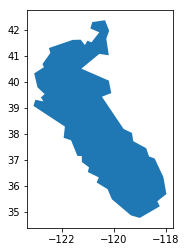

In [6]:
t = gp.read_file("../shape/HU4_merged.shp")
t = t.simplify(0.1)

lls = t.geometry.iloc[0]
x,y = lls.exterior.coords.xy

eep = [list(zip(x,y))]
area = ee.Geometry.Polygon(eep)

t.plot()

In [7]:
def get_snow_data(dataset, year, month):
    
    '''
    mean monthly snowcover (% of pixel)
    '''

    col = dataset[0]
    var = dataset[1]
    scaling_factor = dataset[2]

    t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).select(var).filterBounds(area).mean()
    t2 = t.multiply(ee.Image.pixelArea()).multiply(scaling_factor).multiply(1e-9)
    # Multiply fractional cover by pixel area by the
    scale = t.projection().nominalScale()
    sumdict  = t.reduceRegion(
        reducer = ee.Reducer.sum(),
        geometry = area,
        scale = scale)
    
    result = sumdict.getInfo()[var]
    
    return result

SyntaxError: invalid syntax (<ipython-input-7-f2122b54a587>, line 8)

In [42]:
data = {}
data['fracsnow'] = [ee.ImageCollection('MODIS/006/MOD10A1'),'NDSI_Snow_Cover',1 ]

In [43]:
years = range(2001, 2019)
months = range(1,13)

out = []

for year in years:
    print(year)
    for month in months:
        print(month)
        out.append(get_data(data['fracsnow'], year, month))

2001
1
2
3
4
5
6
7
8
9
10
11
12
2002
1
2
3
4
5
6
7
8
9
10
11
12
2003
1
2
3
4
5
6
7
8
9
10
11
12
2004
1
2
3
4
5
6
7
8
9
10
11
12
2005
1
2
3
4
5
6
7
8
9
10
11
12
2006
1
2
3
4
5
6
7
8
9
10
11
12
2007
1
2
3
4
5
6
7
8
9
10
11
12
2008
1
2
3
4
5
6
7
8
9
10
11
12
2009
1
2
3
4
5
6
7
8
9
10
11
12
2010
1
2
3
4
5
6
7
8
9
10
11
12
2011
1
2
3
4
5
6
7
8
9
10
11
12
2012
1
2
3
4
5
6
7
8
9
10
11
12
2013
1
2
3
4
5
6
7
8
9
10
11
12
2014
1
2
3
4
5
6
7
8
9
10
11
12
2015
1
2
3
4
5
6
7
8
9
10
11
12
2016
1
2
3
4
5
6
7
8
9
10
11
12
2017
1
2
3
4
5
6
7
8
9
10
11
12
2018
1
2
3
4
5
6
7
8
9
10
11
12


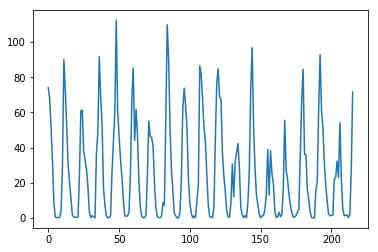

In [44]:
plt.plot(out)

In [348]:

transform = (np.min(uniqueLons),xs,0,np.max(uniqueLats),0,-ys)
 
# set the coordinate system
target = osr.SpatialReference()
target.ImportFromEPSG(4326)
 
# set driver
driver = gdal.GetDriverByName('GTiff')
 
outputDataset = driver.Create("asdf2.tif", ncols,nrows, 1,gdal.GDT_Float32)
 
# add some metadata 
outputDataset.SetGeoTransform(transform)
outputDataset.SetProjection(target.ExportToWkt())
outputDataset.GetRasterBand(1).WriteArray(arr)
outputDataset.GetRasterBand(1).SetNoDataValue(-9999)
outputDataset = None

In [355]:
import rasterio
files = [x for x in os.listdir(os.getcwd()) if x.endswith(".tif")]
files

['asdf.tif', 'asdf2.tif']

In [399]:
ds = gdal.Open(files[0])

In [401]:
data = ds.ReadAsArray()

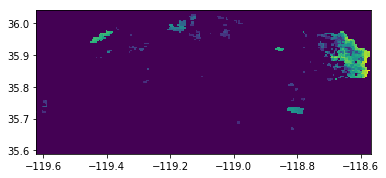

In [403]:
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.imshow(data, extent=[x0, x1, y1, y0])
plt.show()

In [411]:
s = t[t["HUC8"] == hu8s[4]]

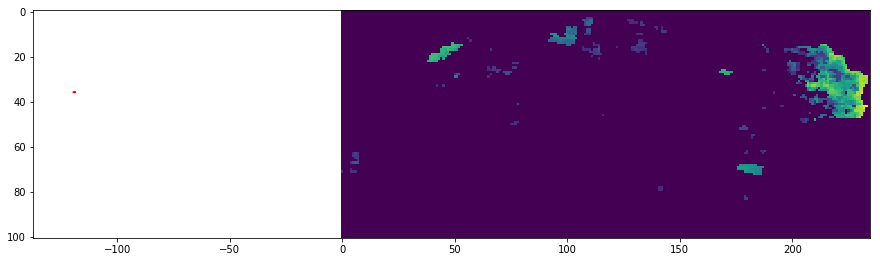

In [412]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(data)
s.plot(ax=ax, facecolor='none', edgecolor='red')

In [133]:
data = DailyValueIO(
    start_date="2000-01-01", 
    end_date="2018-01-01",
    basin="18030007",
    parameter="00060",
)

In [135]:
qs = []
ds = []
lats = []
lons = []

for series in data:
    values = []
    dates = []
    lats.append(series.latitude)
    lons.append(series.longitude)
    
    for row in series.data:
        values.append(row.value)
        dates.append(row.date)
        
    qs.append(values)
    ds.append(dates)

In [136]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(lons, lats)]
df = pd.DataFrame(geometry)
crs = {'init': 'epsg:4326'}
gdf = gp.GeoDataFrame(df, crs=crs, geometry=geometry)

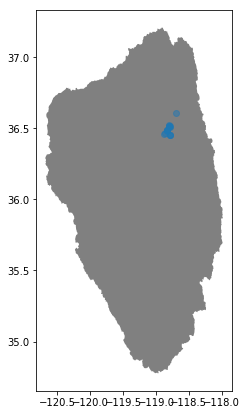

In [140]:
fig, ax = plt.subplots(1, figsize=(3.5,7))
base = tulare.plot(ax=ax, color='gray')
gdf.plot(ax=base, marker="o", alpha=0.5)
# _ = ax.axis('off')

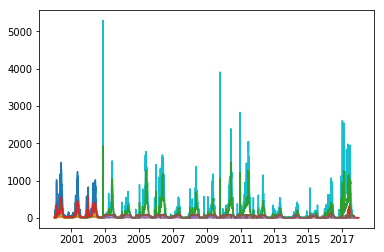

In [138]:
for i, x in enumerate(qs):
    plt.plot(ds[i],qs[i])

# Snowpack

In [108]:
import ee

ee.Initialize()

In [109]:
dataset = ee.ImageCollection('MODIS/006/MOD10A1').filter(ee.Filter.date('2018-01-01', '2018-05-01')).select('NDSI_Snow_Cover');

In [110]:
dataset.getInfo()

{'type': 'ImageCollection',
 'bands': [],
 'id': 'MODIS/006/MOD10A1',
 'version': 1548767837075215,
 'properties': {'date_range': [951350400000.0, 1548460800000.0],
  'period_mapping': [951350400000.0, 1548460800000.0],
  'period': 1.0,
  'system:visualization_0_min': '0.0',
  'system:visualization_0_bands': 'NDSI_Snow_Cover',
  'system:is_global': 1,
  'thumb': 'https://mw1.google.com/ges/dd/images/MOD10A1_thumb.png',
  'description': '<p>The MOD10A1 V6 Snow Cover Daily Global 500m product contains snow cover, snow albedo, fractional snow cover, and quality assessment (QA) data. Snow cover data are based on a snow mapping algorithm that employs a Normalized Difference Snow Index (NDSI) and other criteria tests.</p><p><b>Resolution</b><br>500 meters\n</p><p><b>Cadence</b><br>\n  1 day\n</p><p><b>Bands</b><table class="eecat"><tr><th scope="col">Name</th><th scope="col">Min</th><th scope="col">Max</th><th scope="col">Scale</th><th scope="col">Description</th></tr><tr><td>NDSI_Snow_Cover

In [103]:
from climata.snotel import RegionDailyDataIO

data = RegionDailyDataIO(
    start_date="2013-01-01",
    end_date="2013-12-31",
    basin="18010202",
    parameter="SNWD",
)


RegionDailyDataIOTuple(longitude=-121.33333, elevation=4800.0, data=<wq.io.util.FlatIO object at 0x11afcee10>, countyname=Klamath, fipsstatenumber=41, latitude=42.5, stationtriplet=21G12:OR:SNOW, stationdatatimezone=None, huc=180102020703, fipscountrycd=US, shefid=None, actonid=None, name=Bly 101 Ranch Pp&l (Disc), enddate=1971-12-31 00:00:00, hud=18010202, begindate=1938-01-01 00:00:00, fipscountycd=035)
RegionDailyDataIOTuple(longitude=-121.85, elevation=4190.0, data=<wq.io.util.FlatIO object at 0x11afe25f8>, countyname=Klamath, fipsstatenumber=41, latitude=42.58333, stationtriplet=21G07:OR:SNOW, stationdatatimezone=None, huc=180102020715, fipscountrycd=US, shefid=None, actonid=None, name=Chiloquin (Pp&l), enddate=2009-02-01 00:00:00, hud=18010202, begindate=1927-01-01 00:00:00, fipscountycd=035)
RegionDailyDataIOTuple(longitude=-120.94917, elevation=6180.0, data=<wq.io.util.FlatIO object at 0x11afb4358>, countyname=Klamath, fipsstatenumber=41, latitude=42.6381, stationtriplet=1010:O

In [106]:

for series in data:
    print (series)
    for row in series.data:
        print (row.data)

SyntaxError: invalid syntax (<ipython-input-106-276bcc25178d>, line 5)

In [91]:
vals = []
for series in data:
    print (series)
    print("asdf")

RegionDailyDataIOTuple(longitude=-118.293, elevation=7650.0, data=<wq.io.util.FlatIO object at 0x11a36a9b0>, countyname=Tulare, fipsstatenumber=06, latitude=36.122, stationtriplet=BHM:CA:SNOW, huc=180300010403, fipscountrycd=US, shefid=None, actonid=None, name=Beach Meadows, enddate=2100-01-01 00:00:00, begindate=1930-04-01 00:00:00, fipscountycd=107)
asdf
RegionDailyDataIOTuple(longitude=-118.837, elevation=9800.0, data=<wq.io.util.FlatIO object at 0x11b063278>, countyname=Fresno, fipsstatenumber=06, latitude=37.113, stationtriplet=BMD:CA:SNOW, huc=180300100601, fipscountrycd=US, shefid=None, actonid=None, name=Beard Meadow, enddate=2100-01-01 00:00:00, begindate=1930-04-01 00:00:00, fipscountycd=019)
asdf
RegionDailyDataIOTuple(longitude=-118.445, elevation=10600.0, data=<wq.io.util.FlatIO object at 0x11b2c5278>, countyname=Fresno, fipsstatenumber=06, latitude=36.958, stationtriplet=BNH:CA:SNOW, huc=180300100204, fipscountrycd=US, shefid=None, actonid=None, name=Bench Lake, enddate=2

In [ ]:
data=<wq.io.util.FlatIO object at 0x116323128>

In [45]:
qs = []
ds = []
lats = []
lons = []

for series in data:
    values = []
    dates = []
    lats.append(series.latitude)
    lons.append(series.longitude)
    
    for row in series.data:
        values.append(row.value)
        dates.append(row.date)
        
    qs.append(values)
    ds.append(dates)
    

geometry = [Point(xy) for xy in zip(lons, lats)]
df = pd.DataFrame(geometry)
crs = {'init': 'epsg:4326'}
gdf = gp.GeoDataFrame(df, crs=crs, geometry=geometry)

In [46]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(lons, lats)]
df = pd.DataFrame(geometry)
crs = {'init': 'epsg:4326'}
gdf = gp.GeoDataFrame(df, crs=crs, geometry=geometry)

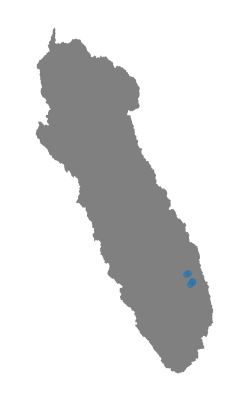

In [47]:
fig, ax = plt.subplots(1, figsize=(3.5,7))
base = t.plot(ax=ax, color='gray')
gdf.plot(ax=base, marker="o", alpha=0.5)
_ = ax.axis('off')

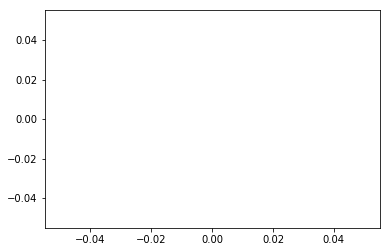

In [48]:
for i, x in enumerate(qs):
    plt.plot(ds[i],qs[i])